<a href="https://colab.research.google.com/github/nowhyun/Study/blob/master/%EB%85%BC%EB%AC%B8%EC%9C%BC%EB%A1%9C%20%EC%A7%9A%EC%96%B4%EB%B3%B4%EB%8A%94%20%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%20%EB%A7%A5/%5B%EC%8B%A4%EC%8A%B5%5D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC_%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주의: 하단 코드는 Python 2에서 실행됩니다. Python 3에서 실행시, 많은 함수가 수정되어야합니다.

###LIBRARY IMPORT

In [0]:
import numpy as np
import os
from scipy.misc import imresize, imread
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
import skimage.io
import skimage.transform
# import tensorflow as tf

%matplotlib inline  
print("Packages loaded")

Packages loaded


### PRINT CURRENT FOLDER

In [0]:
#@title 현재 경로명 입력
#@markdown /My Drive/ [ **any directory you use** ]
Directory = "Blog_github" #@param {type:"string"}

currDir = '/content/drive/My Drive/' + Directory

#현재 코드가 실행되는 디렉토리명
print("Current folder is:", currDir)

('Current folder is:', '/content/drive/My Drive/Blog_github')


### PRINT FUNCTION

In [0]:
def print_typeshape(img):
  print('Type is', type(img))
  print('Shape is', img.shape)

### LOAD AN IMAGE

In [0]:
cat = imread(currDir + '/data/cat_1.jpg')
print_typeshape(cat)

('Type is', <type 'numpy.ndarray'>)
('Shape is', (225, 224, 3))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


### PLOT LOADED IMAGE

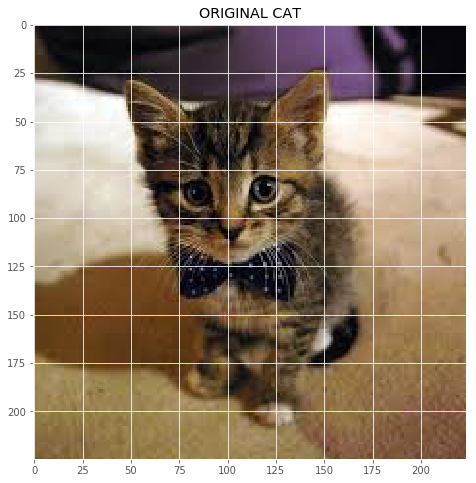

In [0]:
plt.figure(figsize=(10, 8))
plt.imshow(cat)
plt.title('ORIGINAL CAT')
plt.draw()

### LOAD + CAST TO FLOAT?

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


('Type is', <type 'numpy.ndarray'>)
('Shape is', (225, 224, 3))


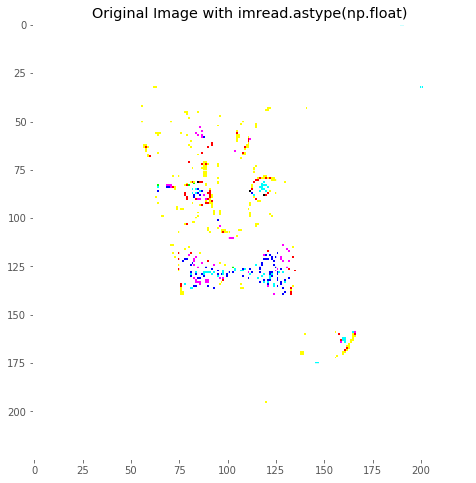

In [0]:
# LOAD
cat2 = imread(currDir + '/data/cat_1.jpg').astype(np.float)
print_typeshape(cat2)

# PLOT
plt.figure(figsize=(10, 8))
plt.imshow(cat2)
plt.title("Original Image with imread.astype(np.float)")
plt.draw()

###WHY DOES THIS CAT LOOK SO WEIRD?

####LOAD + CAST TO FLOAT + NORMALIZE TO 0~1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


('Type is', <type 'numpy.ndarray'>)
('Shape is', (225, 224, 3))


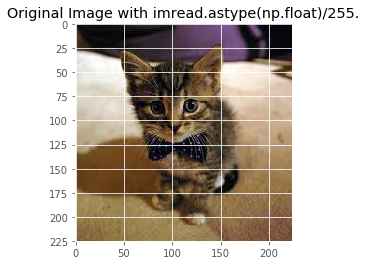

In [0]:
# LOAD
cat3 = imread(currDir + "/data/cat_1.jpg").astype(np.float)/255.
print_typeshape(cat3)

# PLOT
plt.figure(0)
plt.imshow(cat3) # plt.imshow가 float를 받아들이면 값이 0~1사이라고 가정하기때문에 발생하는 문제를 정규화로 해결
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

### RESIZE

('Type is', <type 'numpy.ndarray'>)
('Shape is', (100, 100, 3))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


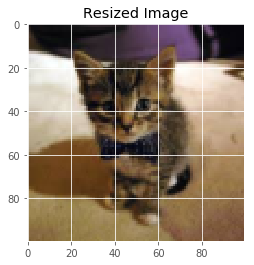

In [0]:
# RESIZE
catsmall = imresize(cat, [100, 100])
print_typeshape(catsmall)
# PLOT
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

###GRAYSCALE

('size of catsmallgray is', ((100, 100),))
('type of catsmallgray is', <type 'numpy.ndarray'>)


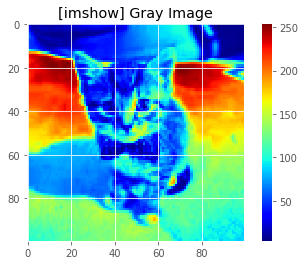

In [0]:
# RGB를 GRAY로 변환, cv2에는 해당 함수가 있습니다.
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb

catsmallgray = rgb2gray(catsmall)
print("size of catsmallgray is", catsmallgray.shape)
print ("type of catsmallgray is", type(catsmallgray))

# cmap확인
plt.imshow(catsmallgray, cmap=plt.get_cmap("jet"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

###RESHAPE<br> 모양을 바꾸는 것. 전체 원소 개수는 동일하게 유지, RESIZE와 차이 구분.

size of catrowvec is (1, 10000)
size of catmatrix is (200, 50)
('type of catmatrix is', <type 'numpy.ndarray'>)


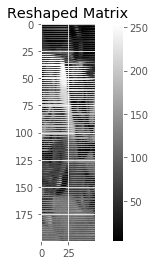

In [0]:
# MATRIX TO VECTOR
catrowvec = np.reshape(catsmallgray, (1, -1));
print ("size of catrowvec is %s" % (catrowvec.shape,))

# VECTOR TO MATRIX
catmatrix = np.reshape(catrowvec, (200, -1));
print ("size of catmatrix is %s" % (catmatrix.shape,))
print ("type of catmatrix is", type(catmatrix))

plt.imshow(catmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

###LOAD FROM FOLDER

[2] FILE ARE IN [/content/drive/My Drive/Blog_github/data/]
[0] TH FILE IS [cat_2.jpg]
[1] TH FILE IS [cat_1.jpg]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


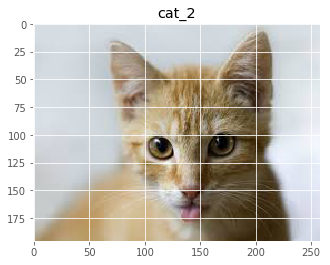

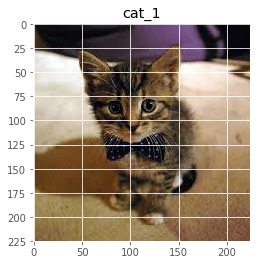

In [0]:
# FIRST, SEE WHAT'S INSIDE THE FOLDER
path = currDir + "/data/"
flist = os.listdir(path)
print ("[{}] FILE ARE IN [{}]" .format(len(flist), path))

# LIST UP FILES INSIDE THE FOLDER
for i, f in enumerate(flist):
    print ("[%d] TH FILE IS [%s]" % (i, f))

# LOAD IMAGES WITH APPROPRIATE EXTENSIONS
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg"]
imgs = []
names = []
for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    # LOAD AND APPEND TO IMGS LIST
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))
    # APPEND NAMES
    names.append(os.path.splitext(f)[0])

# PLOT LOADED IMAGE
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name)
    plt.show()